<a href="https://colab.research.google.com/github/swamyshravan/data-science-projects/blob/main/decision-tree/mushrooms_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

**Load data**

In [36]:
data = pd.read_csv('mushrooms.csv')
#data.head(3)
data.describe()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Since veil_type only has one variable, it will have no effect on the result of the model. We can delete the column from the dataset.

In [4]:
del data['veil_type']
data.head(3)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m


For the dependant variable colum "type", 'P' stands for poisonous and 'e' for edible

In [28]:
#data.bruises.value_counts()
data.describe()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [29]:
from sklearn.preprocessing import LabelEncoder
T_data = data.apply(LabelEncoder().fit_transform)
T_data.head(2)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1


After transformation of all the columns, for the dependant variable "type", 1 is poisonous and 0 is edible

**Seperate dependent and Independent Variables from the dataset**

In [38]:
X = T_data.iloc[:,1:]
y = T_data.iloc[:,0]
#X.head(3)

**Divide the dataset into training and testing dataset**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [35]:
print('train data of',len(X_train),'+ test data of',len(X_test),'= total of',len(data),)

train data of 6499 + test data of 1625 = total of 8124


**Fit decision tree to the training data**

In [12]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
model = dtree.fit(X,y)

**predict the test values using the model we created**

In [13]:
y_pred = model.predict(X_test)

**Using confusion matrix to visualise the accuracy of our prediction**

In [26]:
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['predicted'])
#sn.heatmap(confusion_matrix, annot=True)
#confusion_matrix

**From sklearn we can also use classification report and confusion matrix to visualize accuracy**

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[818   0]
 [  0 807]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       818
           1       1.00      1.00      1.00       807

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



**Visualising the tree using sklean and graphviz**

In [19]:
#from sklearn import tree
#tree.plot_tree(model)

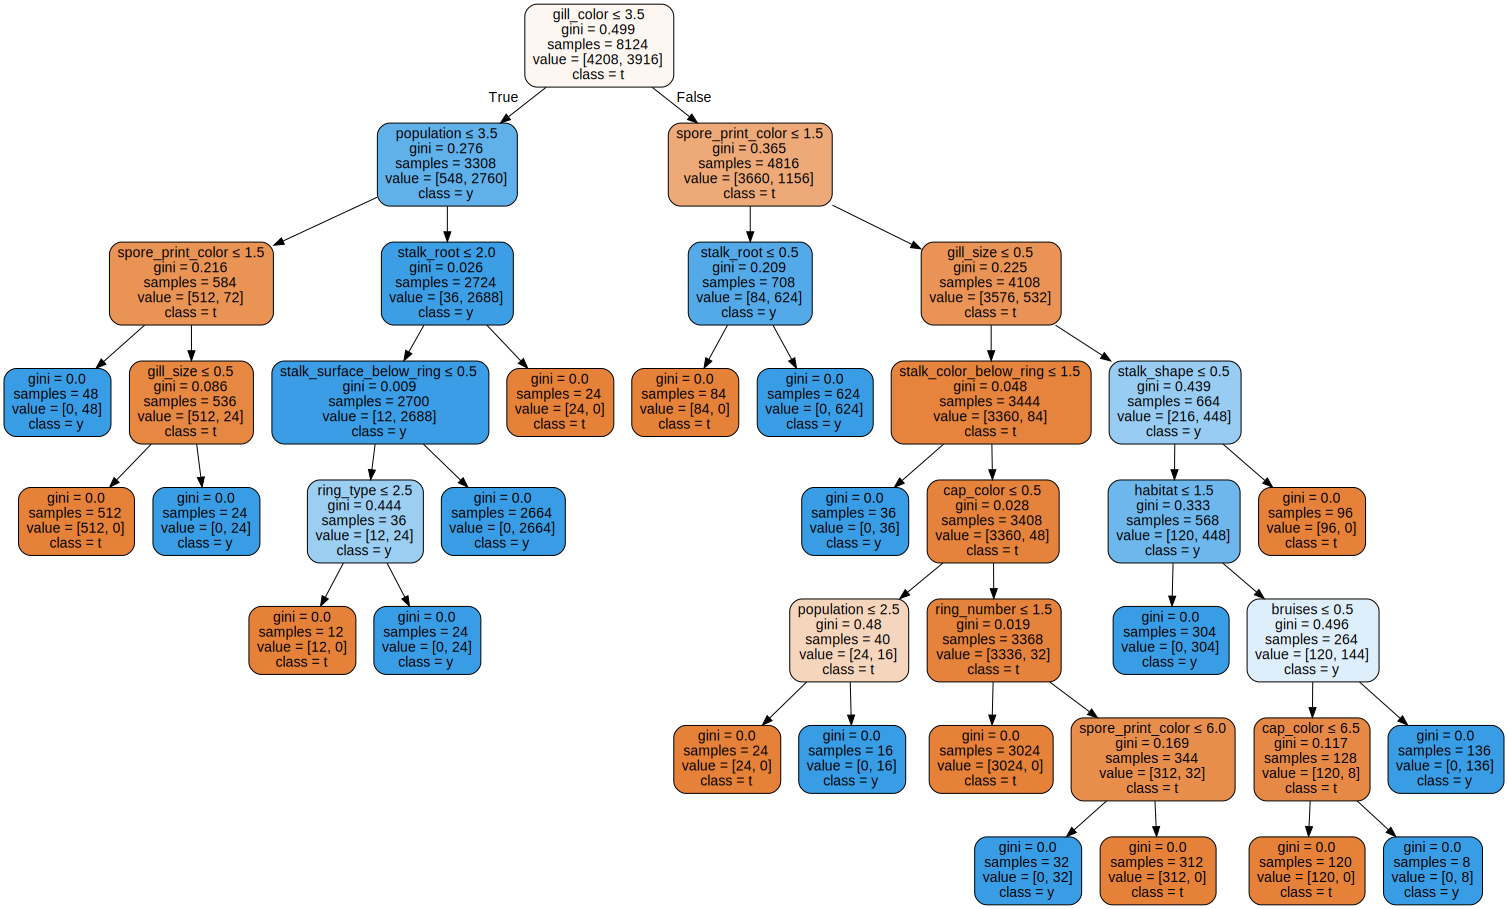

In [23]:
import graphviz 
#dot_data = tree.export_graphviz(model, out_file=None)
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X.columns,
                                class_names='type',
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data) 
#graph.render("mushrooms") #use this to sava a pdf file of the tree
graph